In [1]:
#Import the appropriate libraries 
%matplotlib inline

import h2o
import pandas
import pprint
import operator
import matplotlib
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from tabulate import tabulate

/Users/avniwadhwa/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Task 1: Connect to a cluster

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 hours 33 mins
H2O cluster version:,3.10.0.8
H2O cluster version age:,1 month and 28 days
H2O cluster name:,H2O_from_python_avniwadhwa_lwcddv
H2O cluster total nodes:,1
H2O cluster free memory:,3.233 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [3]:
# set this to True if interactive (matplotlib) plots are desired
interactive = True
if not interactive: matplotlib.use('Agg', warn=False)
import matplotlib.pyplot as plt

In [4]:
# Task 2: Load data - 1 row per flight.  Has columns showing the origin,
# destination, departure and arrival time, carrier information, and
# whether the flight was delayed.
print("Import and Parse airlines data")
data = h2o.import_file(path='https://s3.amazonaws.com/h2o-airlines-unpacked/allyears2k.csv')
data.describe()

Import and Parse airlines data
Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%
Rows:43978
Cols:31




,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,IsArrDelayed,IsDepDelayed
type,int,int,int,int,int,int,int,int,enum,int,enum,int,int,int,int,int,enum,enum,int,int,int,int,enum,int,int,int,int,int,int,enum,enum
mins,1987.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,16.0,17.0,14.0,-63.0,-16.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,1997.5,1.40909090909,14.6010732639,3.82061485288,1345.84666138,1313.22286143,1504.63413038,1485.28916731,NaN,818.842989677,NaN,124.814529135,125.021562607,114.316111091,9.31711193698,10.0073906556,NaN,NaN,730.182190565,5.38136805953,14.1686341847,0.0246941652645,NaN,0.00247851198326,4.04780029106,0.289376469271,4.85503190418,0.0170155602821,7.62006045002,0.555755150302,0.525057983537
maxs,2008.0,10.0,31.0,7.0,2400.0,2359.0,2400.0,2359.0,9.0,3949.0,3500.0,475.0,437.0,402.0,475.0,473.0,131.0,133.0,3365.0,128.0,254.0,1.0,3.0,1.0,369.0,201.0,323.0,14.0,373.0,1.0,1.0
sigma,6.34436090171,1.87471137134,9.17579042586,1.90501311913,465.340899124,476.251139993,484.347487904,492.750434123,NaN,777.404369164,NaN,73.9744416606,73.40159463,69.6363295151,29.8402219624,26.4388090429,NaN,NaN,578.43800823,4.20197993986,9.9050857472,0.155193141358,NaN,0.0497234872189,16.2057299045,4.41677989873,18.6197762215,0.403940182102,23.4875658741,0.496887288343,0.499377380318
zeros,0,0,0,0,0,569,0,569,724,0,2,0,0,0,1514,6393,59,172,0,623,557,42892,81,43869,7344,8840,7388,8914,7140,19537,20887
missing,0,0,0,0,1086,0,1195,0,0,0,32,1195,13,16649,1195,1086,0,0,35,16026,16024,0,9774,0,35045,35045,35045,35045,35045,0,0
0,1987.0,10.0,14.0,3.0,741.0,730.0,912.0,849.0,PS,1451.0,NA,91.0,79.0,nan,23.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES
1,1987.0,10.0,15.0,4.0,729.0,730.0,903.0,849.0,PS,1451.0,NA,94.0,79.0,nan,14.0,-1.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,NO
2,1987.0,10.0,17.0,6.0,741.0,730.0,918.0,849.0,PS,1451.0,NA,97.0,79.0,nan,29.0,11.0,SAN,SFO,447.0,nan,nan,0.0,NA,0.0,nan,nan,nan,nan,nan,YES,YES


In [5]:
# ----------

# 2- Data exploration and munging. Generate scatter plots 
# of various columns and plot fitted GLM model.

# Function to fit a GLM model and plot the fitted (x,y) values
def scatter_plot(data, x, y, max_points = 1000, fit = True):
    if(fit):
        lr = H2OGeneralizedLinearEstimator(family = "gaussian")
        lr.train(x=x, y=y, training_frame=data)
        coeff = lr.coef()
    df = data[[x,y]]
    runif = df[y].runif()
    df_subset = df[runif < float(max_points)/data.nrow]
    df_py = h2o.as_list(df_subset)
    
    if(fit): h2o.remove(lr._id)

    # If x variable is string, generate box-and-whisker plot
    if(df_py[x].dtype == "object"):
        if interactive: df_py.boxplot(column = y, by = x)
    # Otherwise, generate a scatter plot
    else:
        if interactive: df_py.plot(x = x, y = y, kind = "scatter")
    
    if(fit):
        x_min = min(df_py[x])
        x_max = max(df_py[x])
        y_min = coeff["Intercept"] + coeff[x]*x_min
        y_max = coeff["Intercept"] + coeff[x]*x_max
        plt.plot([x_min, x_max], [y_min, y_max], "k-")
    if interactive: plt.show()


glm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


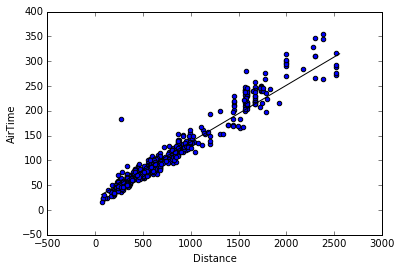

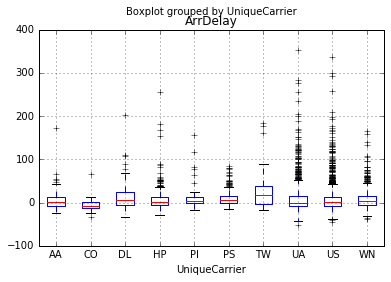

In [6]:
# Task 3: Generate scatterplots for "Distance" and "Airtime" and one for "Unique Carrier" and the "ArrDelay" 


In [7]:
# Task 4: Use the .group_by function to group flights by month 
grouped = 
bpd = 

Month,sum_Cancelled,nrow_Year
1,1067,41979
10,19,1999


Rows:2
Cols:3




,Month,sum_Cancelled,nrow_Year
type,int,int,int
mins,1.0,19.0,1999.0
mean,5.5,543.0,21989.0
maxs,10.0,1067.0,41979.0
sigma,6.36396103068,741.047906684,28270.1291118
zeros,0,0,0
missing,0,0,0
0,1.0,1067.0,41979.0
1,10.0,19.0,1999.0


[2, 3]

In [8]:
# Task 5: Convert the "Year," "Month," "DayOfWeek," "Cancelled" columns to factors
data["Year"]      = data["Year"]     .asfactor()
data["Month"]     = data["Month"]    .asfactor()
data["DayOfWeek"] = data["DayOfWeek"].asfactor()
data["Cancelled"] = data["Cancelled"].asfactor()

Parse progress: |█████████████████████████████████████████████████████████████████████████████| 100%
glm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


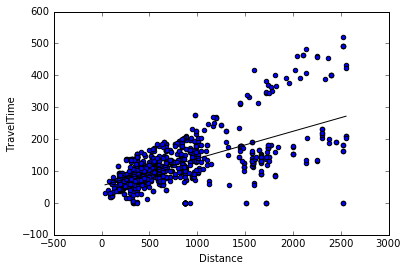

In [9]:
# Calculate and plot travel time
hour1 = data["CRSArrTime"] / 100
mins1 = data["CRSArrTime"] % 100
arrTime = hour1*60 + mins1

hour2 = data["CRSDepTime"] / 100
mins2 = data["CRSDepTime"] % 100
depTime = hour2*60 + mins2


data["TravelTime"] = 


glm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


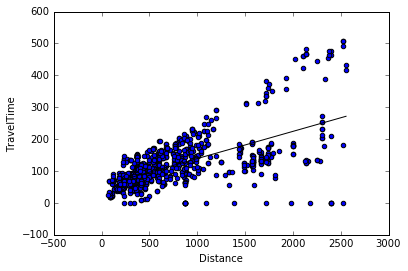

In [10]:
# Task 6: Impute missing travel times by the "Origin" and "Dest" columns and re-plot. 


In [11]:
# Task 7: Create a test/train split
split = 
train =
test  = 

In [12]:
# Task 8: Set response variable and your choice of predictor variables
myY = "IsDepDelayed"
myX = 

In [13]:
# Task 9: Build simple GLM model

data_glm = 

glm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


In [14]:
# Task 10: Build simple GBM model

data_gbm = 



gbm Model Build progress: |███████████████████████████████████████████████████████████████████| 100%


In [15]:
# Variable importances from each algorithm
# Calculate magnitude of normalized GLM coefficients
from six import iteritems
glm_varimp = data_glm.coef_norm()
for k,v in iteritems(glm_varimp):
    glm_varimp[k] = abs(glm_varimp[k])
    
# Sort in descending order by magnitude
glm_sorted = sorted(glm_varimp.items(), key = operator.itemgetter(1), reverse = True)
table = tabulate(glm_sorted, headers = ["Predictor", "Normalized Coefficient"], tablefmt = "orgtbl")
print("Variable Importances:\n\n" + table)

data_glm.varimp()
data_gbm.varimp()

Variable Importances:

| Predictor        |   Normalized Coefficient |
|------------------+--------------------------|
| Year.2008        |               2.25931    |
| Origin.LIH       |               1.87383    |
| Year.2003        |               1.67963    |
| Dest.LYH         |               1.53       |
| Origin.MDW       |               1.47075    |
| Origin.HPN       |               1.46759    |
| Year.2007        |               1.44941    |
| Origin.TLH       |               1.411      |
| Origin.CAE       |               1.29575    |
| Dest.HTS         |               1.26756    |
| Origin.MLB       |               1.21089    |
| Origin.LEX       |               1.19798    |
| Origin.MYR       |               1.14159    |
| Origin.ERI       |               1.12833    |
| Origin.HNL       |               1.12592    |
| UniqueCarrier.TW |               1.10475    |
| UniqueCarrier.HP |               1.08403    |
| Origin.LBB       |               1.04048    |
| Origin.OGG     

[(u'Year', 2367.470947265625, 1.0, 0.8459032133822162),
 (u'Origin', 431.27825927734375, 0.18216834287891065, 0.15409678661778387),
 (u'Month', 0.0, 0.0, 0.0),
 (u'DayOfWeek', 0.0, 0.0, 0.0),
 (u'UniqueCarrier', 0.0, 0.0, 0.0),
 (u'FlightNum', 0.0, 0.0, 0.0),
 (u'Dest', 0.0, 0.0, 0.0),
 (u'Distance', 0.0, 0.0, 0.0)]

In [16]:
# Model performance of GBM model on test data



ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.23445812582
RMSE: 0.484208762643
LogLoss: 0.661718519336
Mean Per-Class Error: 0.359023952176
AUC: 0.674330578177
Gini: 0.348661156354
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.449301377218: 


,NO,YES,Error,Rate
NO,682.0,4540.0,0.8694,(4540.0/5222.0)
YES,277.0,5460.0,0.0483,(277.0/5737.0)
Total,959.0,10000.0,0.4395,(4817.0/10959.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4493014,0.6939061,19.0
max f2,0.4324853,0.8459905,20.0
max f0point5,0.5404476,0.6583047,8.0
max accuracy,0.5404476,0.6381969,8.0
max precision,0.6053035,0.7825521,1.0
max recall,0.4324853,1.0,20.0
max specificity,0.6210166,0.9465722,0.0
max absolute_mcc,0.5404476,0.2832069,8.0
max min_per_class_accuracy,0.5234628,0.6070471,10.0
max mean_per_class_accuracy,0.5404476,0.6409760,8.0


Gains/Lift Table: Avg response rate: 52.35 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.1161602,0.6210166,1.4915714,1.4915714,0.7808327,0.7808327,0.1732613,0.1732613,49.1571436,49.1571436
,2,0.2197281,0.6009209,1.3396868,1.4199813,0.7013216,0.7433555,0.1387485,0.3120098,33.9686815,41.9981301
,3,0.3143535,0.5682775,1.0941926,1.3219137,0.5728062,0.6920174,0.1035384,0.4155482,9.4192581,32.1913695
,4,0.4147276,0.5417959,1.3111137,1.3192998,0.6863636,0.6906491,0.1316019,0.5471501,31.1113664,31.9299826
,5,0.5207592,0.5234628,0.8482613,1.2233919,0.4440620,0.6404416,0.0899425,0.6370926,-15.1738706,22.3391858
,6,0.6126471,0.5055687,0.9503735,1.1824432,0.4975174,0.6190051,0.0873279,0.7244204,-4.9626469,18.2443175
,7,0.8078292,0.4657434,0.8028511,1.0907288,0.4202899,0.5709929,0.1567021,0.8811225,-19.7148942,9.0728780
,8,0.9124920,0.4493014,0.6744934,1.0429866,0.3530950,0.546,0.0705944,0.9517169,-32.5506634,4.2986578
,9,1.0,0.4324853,0.5517562,1.0,0.2888425,0.5234967,0.0482831,1.0,-44.8243778,0.0
